In [3]:
# 加载 Python 库
# 加载数据预处理模块
import pandas as pd
# 加载绘图模块
import seaborn as sns

sns.set_style(style="darkgrid")



# 数据读取

In [10]:
# 数据读取
raw_df = pd.read_csv(r"DXY-test.csv", encoding="gbk")
# 输出前两行数据，不加参数默认输出前 5 行
raw_df.head(200)


,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,seriousIncr,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime
0,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,-384.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12
1,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,-384.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12
2,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,-384.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12
3,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,-384.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12
4,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,-384.0,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,16134.0,80969,86,61673,3162,4492.0,NaN,NaN,NaN,NaN,...,NaN,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.583970e+12
196,16134.0,80969,86,61673,3162,4492.0,NaN,NaN,NaN,NaN,...,NaN,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.583970e+12
197,16134.0,80969,86,61673,3162,4492.0,NaN,NaN,NaN,NaN,...,NaN,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.583970e+12
198,16134.0,80969,86,61673,3162,4492.0,NaN,NaN,NaN,NaN,...,NaN,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.583970e+12


# 缺失值处理

## 缺失值查看

In [9]:
# 查看前 5 个样本中，数据是否为缺失值。
raw_df.head(2000).isnull()

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,seriousIncr,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1996,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1997,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1998,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [7]:
# 查看每个特征是否存在缺失值
raw_df.isnull().any()

currentConfirmedCount     True
confirmedCount           False
suspectedCount           False
curedCount               False
deadCount                False
seriousCount              True
currentConfirmedIncr      True
confirmedIncr             True
suspectedIncr             True
curedIncr                 True
deadIncr                  True
seriousIncr               True
remark1                  False
remark2                  False
remark3                   True
remark4                   True
remark5                   True
note1                     True
note2                     True
note3                     True
updateTime               False
dtype: bool

In [13]:
# 查看每个特征缺失值的总数
raw_df.isnull().sum()

currentConfirmedCount     875
confirmedCount              0
suspectedCount              0
curedCount                  0
deadCount                   0
seriousCount              280
currentConfirmedIncr     1280
confirmedIncr             756
suspectedIncr             756
curedIncr                 756
deadIncr                  756
seriousIncr               756
remark1                     0
remark2                     0
remark3                   314
remark4                  2449
remark5                  2451
note1                     350
note2                     350
note3                     350
updateTime                  0
currentConfirmedIncr        0
dtype: int64

## 缺失值填充

In [16]:
#观察疫情数据样本的 currentConfirmedIncr，发现经常出现连续多天数值不变，因此用前一个非缺失值去填充该缺失值。
raw_df["currentConfirmedIncr"] = raw_df["currentConfirmedIncr"].ffill()
raw_df["currentConfirmedIncr"]

0      -1357.0
1      -1357.0
2      -1358.0
3      -1358.0
4      -1358.0
         ...  
2446     890.0
2447     890.0
2448     890.0
2449     890.0
2450     890.0
Name: currentConfirmedIncr, Length: 2451, dtype: float64

In [17]:
# 查看每个特征缺失值是否都完成处理，如果还有特征存在缺失值，需要对该特征进一步处理缺失值
raw_df.isnull().sum()

currentConfirmedCount     875
confirmedCount              0
suspectedCount              0
curedCount                  0
deadCount                   0
seriousCount              280
currentConfirmedIncr        0
confirmedIncr             756
suspectedIncr             756
curedIncr                 756
deadIncr                  756
seriousIncr               756
remark1                     0
remark2                     0
remark3                   314
remark4                  2449
remark5                  2451
note1                     350
note2                     350
note3                     350
updateTime                  0
currentConfirmedIncr        0
dtype: int64

In [18]:
raw_df.to_csv('DXY-test-filled.csv')

In [27]:
raw_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime,currentConfirmedIncr
0,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1357.0
1,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1357.0
2,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
3,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
4,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,NaN,894,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579870e+12,890.0
2447,NaN,887,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0
2448,NaN,887,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0
2449,NaN,887,1075,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0


## 缺失值删除

In [28]:
#删除新数据集的所有缺失值
non_na_df = raw_df.dropna()
non_na_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime,currentConfirmedIncr


In [29]:
non_na_df = raw_df

In [24]:
#当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引
non_na_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新
#检查数据集中是否含有缺失值
non_na_df.isnull().any()

currentConfirmedCount    False
confirmedCount           False
suspectedCount           False
curedCount               False
deadCount                False
seriousCount             False
currentConfirmedIncr     False
confirmedIncr            False
suspectedIncr            False
curedIncr                False
deadIncr                 False
seriousIncr              False
remark1                  False
remark2                  False
remark3                  False
remark4                  False
remark5                  False
note1                    False
note2                    False
note3                    False
updateTime               False
currentConfirmedIncr     False
dtype: bool

In [25]:
non_na_df.to_csv("DXY-test-filled-deled.csv")

# 重复值处理

In [31]:
non_na_df

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime,currentConfirmedIncr
0,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1357.0
1,10821.0,81062,114,67037,3204,3226.0,-1357.0,41.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1357.0
2,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
3,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
4,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,NaN,894,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579870e+12,890.0
2447,NaN,887,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0
2448,NaN,887,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0
2449,NaN,887,1075,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0


In [30]:
non_na_df_cp = non_na_df.drop_duplicates(["suspectedCount",'curedCount'],keep='last')
non_na_df_cp.reset_index(drop=True,inplace=True)
non_na_df_cp

,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,currentConfirmedIncr,confirmedIncr,suspectedIncr,curedIncr,...,remark1,remark2,remark3,remark4,remark5,note1,note2,note3,updateTime,currentConfirmedIncr
0,10820.0,81061,114,67037,3204,3226.0,-1358.0,40.0,19.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584280e+12,-1358.0
1,10818.0,81059,112,67037,3204,3226.0,-1360.0,38.0,17.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584270e+12,-1360.0
2,10818.0,81059,111,67037,3204,3226.0,-1360.0,38.0,16.0,1388.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584270e+12,-1360.0
3,10827.0,81058,111,67027,3204,3226.0,-1351.0,37.0,16.0,1378.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584270e+12,-1351.0
4,10828.0,81058,111,67026,3204,3226.0,-1350.0,37.0,16.0,1377.0,...,易感人群：人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期：一般为 3～7 天，最长不超过 14 天，潜伏期内可能存在传染性，其中无症状病例传染...,宿主：野生动物，可能为中华菊头蝠,NaN,NaN,病毒：SARS-CoV-2，其导致疾病命名 COVID-19,传染源：新冠肺炎的患者。无症状感染者也可能成为传染源。,传播途径：经呼吸道飞沫、接触传播是主要的传播途径。气溶胶传播和消化道等传播途径尚待明确。,1.584270e+12,-1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,NaN,1287,1965,38,41,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579910e+12,890.0
1357,NaN,1118,1076,37,41,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579910e+12,890.0
1358,NaN,894,1076,36,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579870e+12,890.0
1359,NaN,887,1076,35,26,NaN,890.0,NaN,NaN,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,NaN,NaN,NaN,NaN,NaN,NaN,1.579860e+12,890.0


In [32]:
non_na_df_cp.to_csv("DXY-test-filled-nodup.csv")

# 异常值处理

## 查看数据基本信息

In [33]:
confirmedIncr_copy = non_na_df.copy()
print(confirmedIncr_copy["confirmedIncr"].to_frame().describe())
confirmedIncr_copy["confirmedIncr"]

       confirmedIncr
count    1695.000000
mean     1888.315634
std      2552.736899
min       -33.000000
25%       268.000000
50%      1751.000000
75%      2924.000000
max     15177.000000


0       41.0
1       41.0
2       40.0
3       40.0
4       40.0
        ... 
2446     NaN
2447     NaN
2448     NaN
2449     NaN
2450     NaN
Name: confirmedIncr, Length: 2451, dtype: float64

## 数据可视化

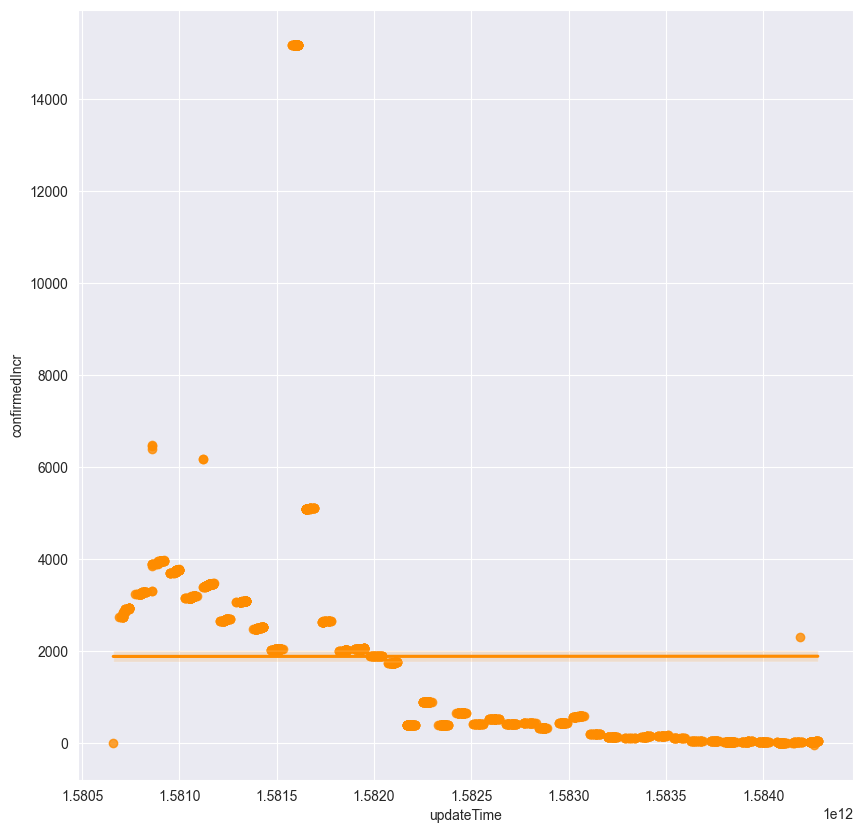

In [34]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))
sns.regplot(x="updateTime", y="confirmedIncr", color='darkorange',data= confirmedIncr_copy)
confirmedIncr_copy.to_csv('DXY-confirmedIncr-1.csv') #保存文件